In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Load the Data

In [2]:
# Read the CSV file and store it in a dataframe
bottle = pd.read_csv('bottle.csv')
bottle.head(2)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Explore and Describe the data

In [3]:
bottle.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [4]:
print(f"Number of columns of CalCOFI dataset: {bottle.shape[1]}")
print(f"Number of rows of CalCOFI dataset: {bottle.shape[0]}")

Number of columns of CalCOFI dataset: 74
Number of rows of CalCOFI dataset: 864863


Prints information about a the DataFrame including the index dtype and columns, non-null values and memory usage.

In [5]:
bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

Since there is a column name that is quite longer, rename it to make it shorter

In [6]:
bottle = bottle.rename(columns={"DIC Quality Comment": "DIC_Qual"})

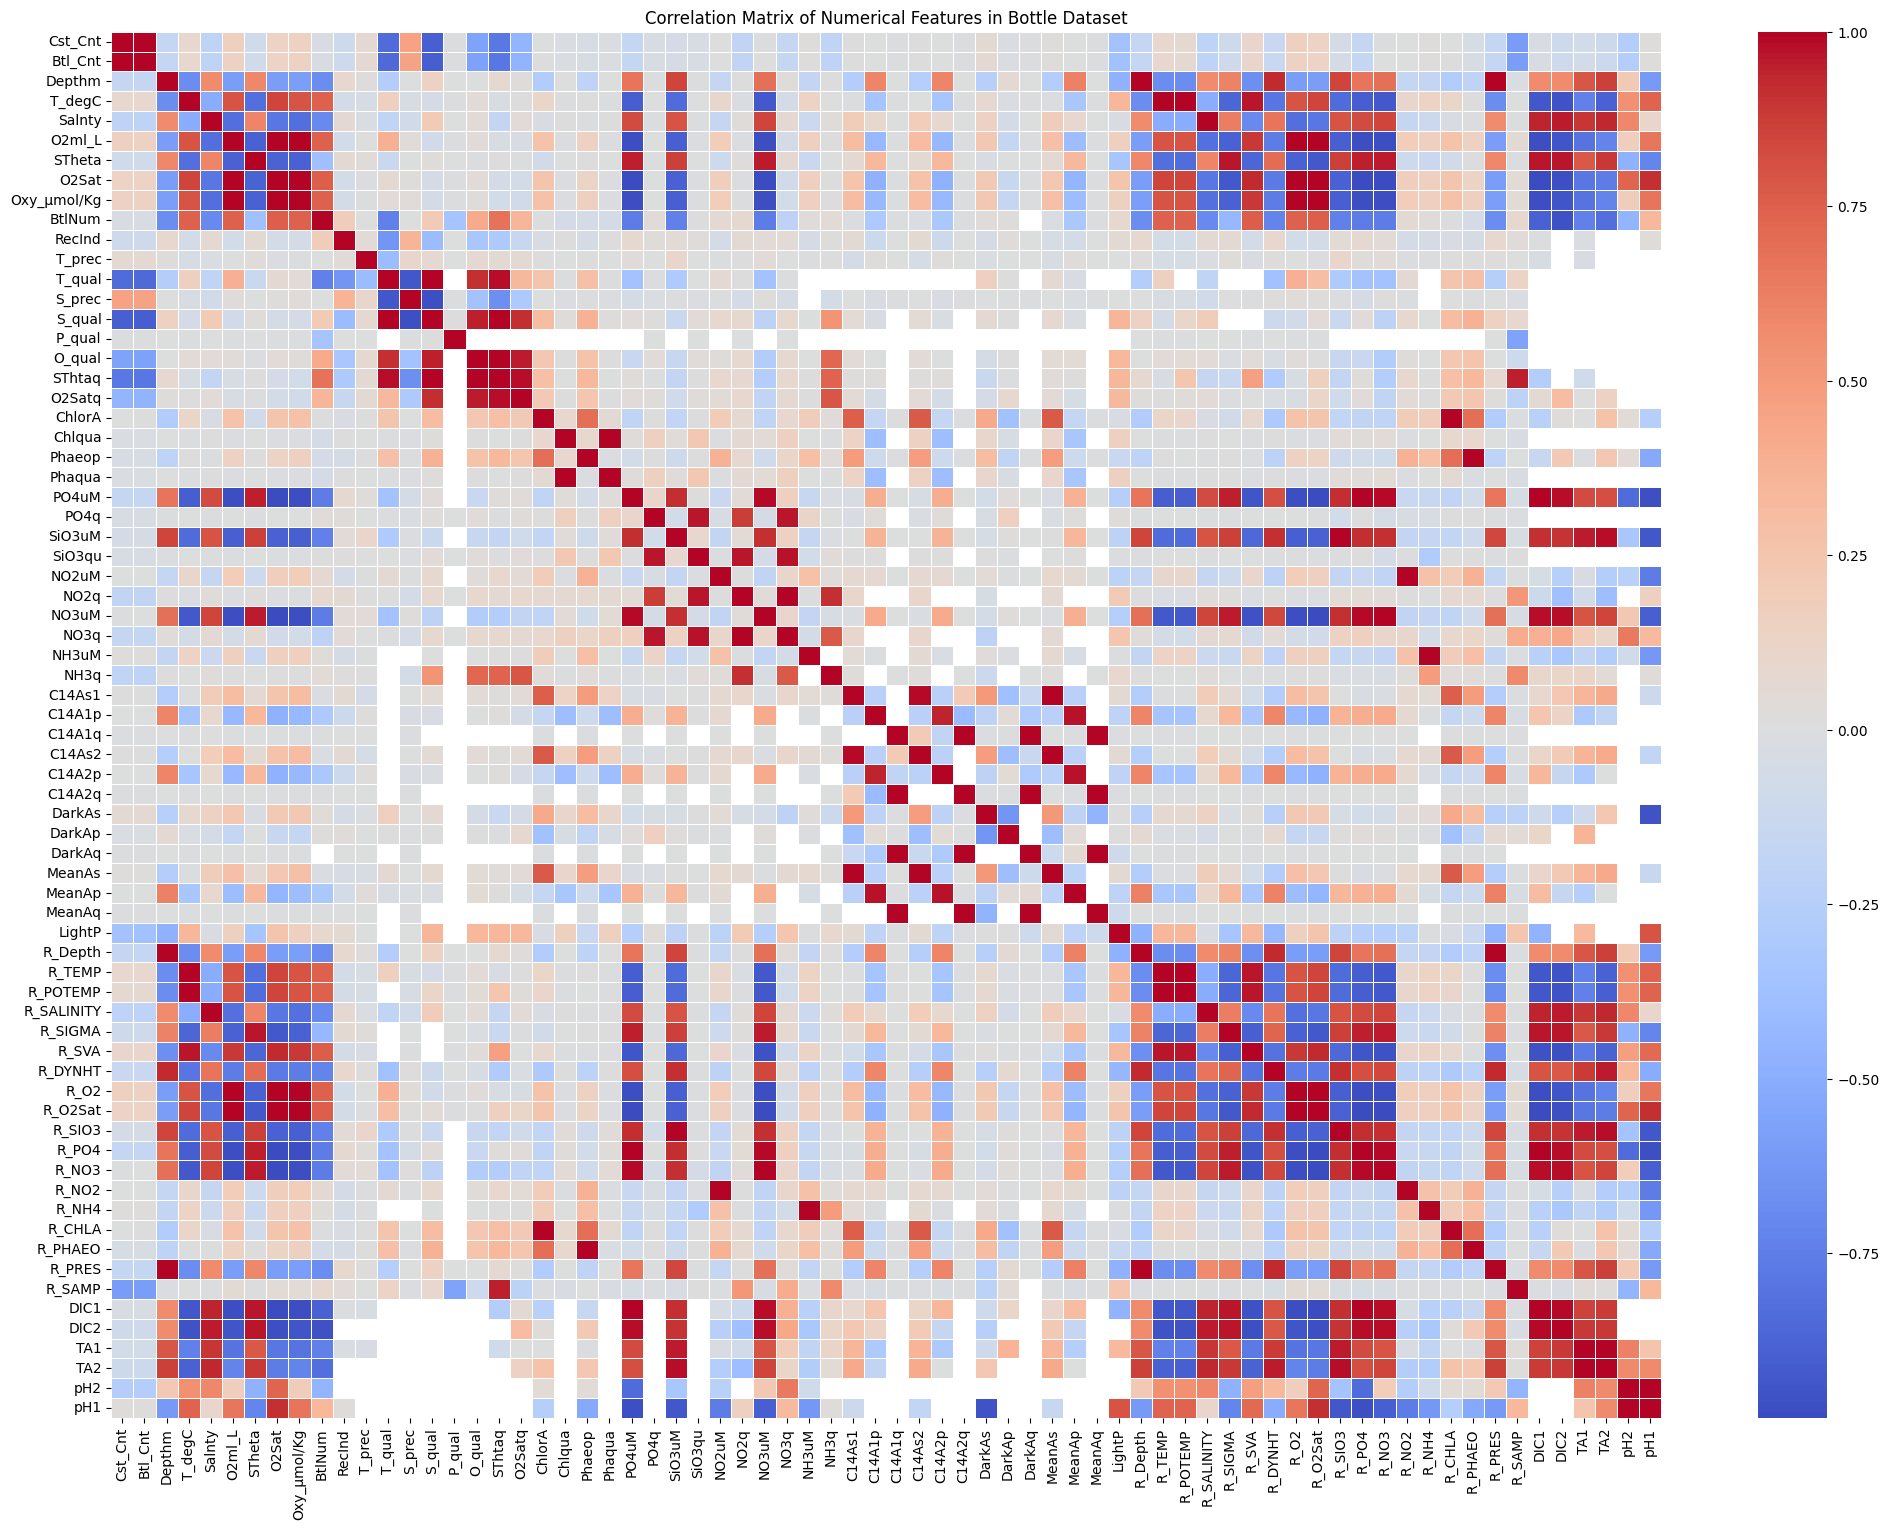

In [7]:
# Select just the columns that are 'number' type
numerical_bottle = bottle.select_dtypes(include=['number'])

# Compute the correlation matrix on these columns
corr_matrix = numerical_bottle.corr()

# Plot the correlation matrix as heatmap
plt.figure(figsize=(25, 18))
sns.heatmap(corr_matrix, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features in Bottle Dataset")
plt.show()

Correlation of features just with the target T_degC

<Axes: >

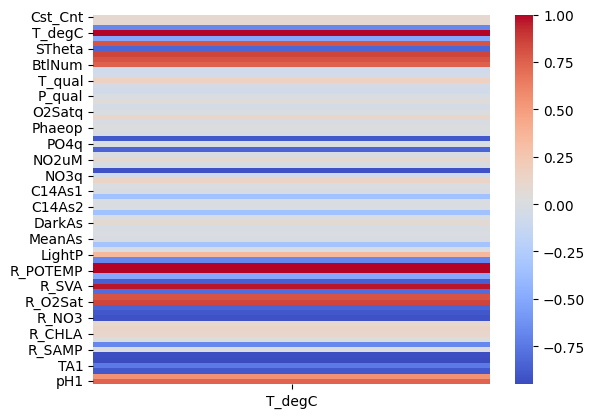

In [8]:
x = corr_matrix[['T_degC']]
sns.heatmap(x, cmap="coolwarm")

Show the number of null elements on each column

In [9]:
bottle.isnull().sum()

Cst_Cnt          0
Btl_Cnt          0
Sta_ID           0
Depth_ID         0
Depthm           0
             ...  
TA1         862779
TA2         864629
pH2         864853
pH1         864779
DIC_Qual    864808
Length: 74, dtype: int64

We also decided to use heatmaps to show the number of null elements per column

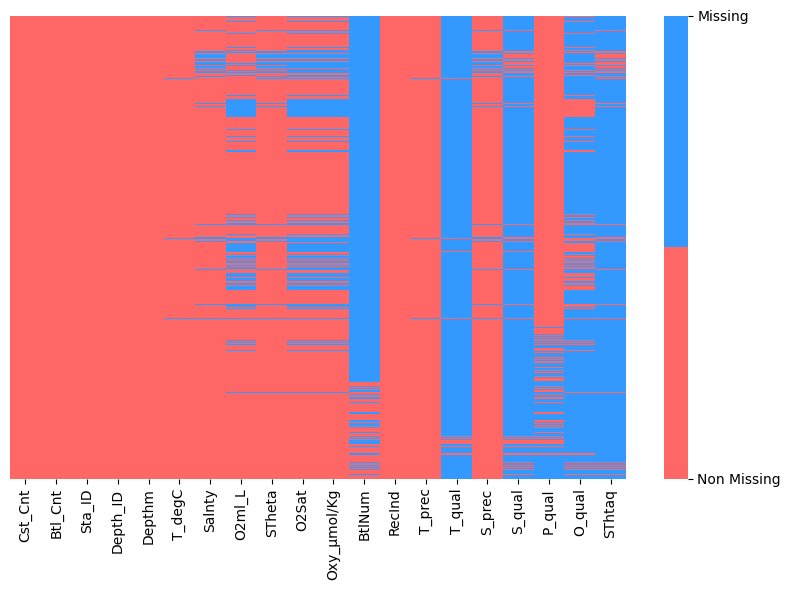

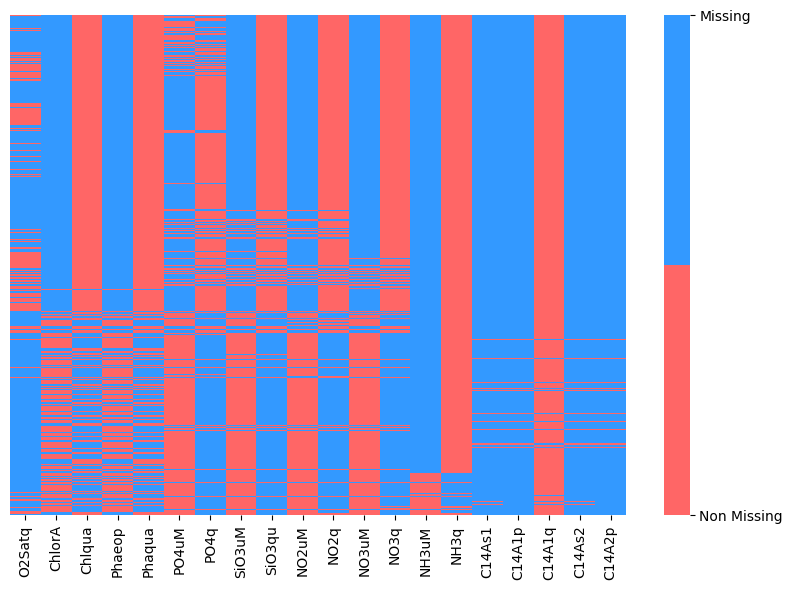

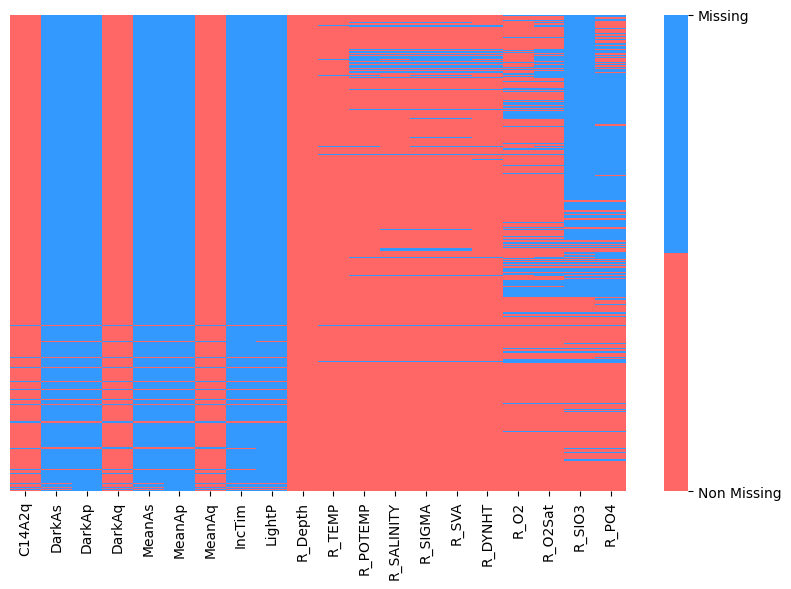

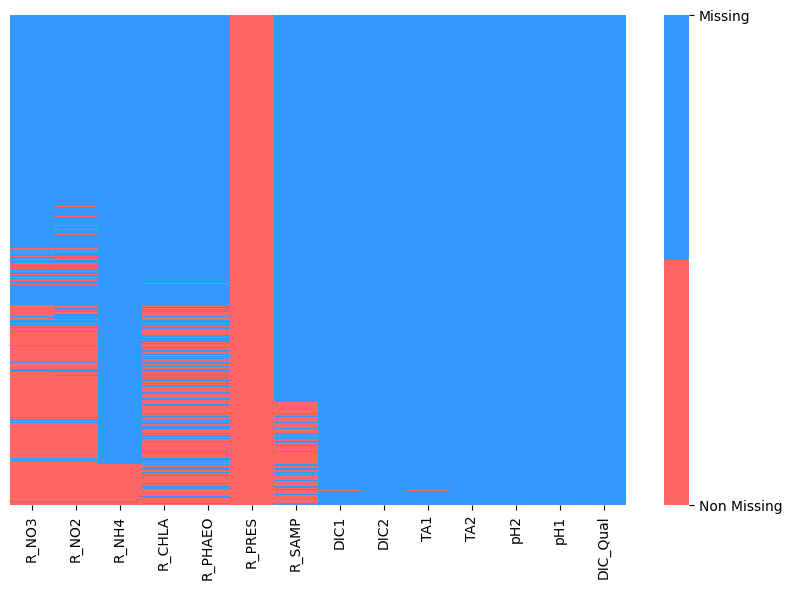

In [10]:
cmap = sns.color_palette(["#FF6666", "#3399FF"])
chunk_size = 20  # Divide into chunk since there are too much columns to print all the data on a single heatmap
figure_size = (8, 6)

for i in range(0, len(bottle.columns), chunk_size): # Takes 20 columns per heatmap
    plt.figure(figsize=figure_size)
    
    # Get current chunk of data
    chunk_data = bottle.iloc[:, i:i + chunk_size]
    
    # Create heatmap
    heatmap = sns.heatmap(chunk_data.isna(),
                          cbar=True,
                          cmap=cmap,
                          yticklabels=False)
    
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    colorbar = heatmap.collections[0].colorbar
    colorbar.set_ticks([0, 1])
    colorbar.set_ticklabels(['Non Missing', 'Missing'])
    
    plt.show()

# Pre-process of data

With the explorations done till now, we noticed 2 things:

1. A lot of features aren't correlated with the target **T_degC**

2. A lot of features have missing values

So, we have decided to keep just the features that have less than $20\%$ of missing values and then in order to not have a lot of features that are correleated between eachother, we keep just those that have a correlation $<$ 0.5.
We are going to create a new dataset, **new_bottle** with selected features + T_degC (target)

In [11]:
# Select numerical columns
numerical_bottle = bottle.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_bottle.corr()

# Get correlation of all features with "T_degC"
target_corr = corr_matrix["T_degC"].drop("T_degC")  # Exclude self-correlation

# Compute percentage of missing values
missing_percent = numerical_bottle.isnull().mean() * 100

# Apply condition missing percentage < 20%
valid_features = target_corr[(missing_percent < 20)].index.tolist()

# Further filter: ensure features are uncorrelated with each other (|correlation| < 0.5)
uncorrelated_features = []
for feature in valid_features:
    is_uncorrelated = True
    for selected_feature in uncorrelated_features:
        if abs(corr_matrix.loc[feature, selected_feature]) > 0.7:
            is_uncorrelated = False
            break
    if is_uncorrelated:
        uncorrelated_features.append(feature) 

# Create new dataframe with selected features + T_degC (to maintain target)
new_bottle = bottle[uncorrelated_features + ["T_degC"]]

# Print results
if not new_bottle.empty:
    print(f"New dataframe created with {len(uncorrelated_features)} features + T_degC.")
    print(new_bottle.info())

    # Visualize correlation heatmap for selected features
    #plt.figure(figsize=(8, 5))
    #sns.heatmap(corr_matrix.loc[["T_degC"], uncorrelated_features], annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    #plt.title("Features Strongly Correlated with T_degC (|corr| > 0.5, Missing % < 20%, Uncorrelated Amongst Themselves)")
    #plt.show()
else:
    print("No features meet both conditions. 'new_bottle' is empty.")


New dataframe created with 9 features + T_degC.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Cst_Cnt  864863 non-null  int64  
 1   Depthm   864863 non-null  int64  
 2   Salnty   817509 non-null  float64
 3   STheta   812174 non-null  float64
 4   RecInd   864863 non-null  int64  
 5   T_prec   853900 non-null  float64
 6   S_prec   817509 non-null  float64
 7   NH3q     808299 non-null  float64
 8   C14A1q   848605 non-null  float64
 9   T_degC   853900 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 66.0 MB
None


By doing this, we moved from a dataset of more than 70 features to a dataset with 9 features

In [12]:
print(f"Number of missing values per columns before manipulation: {new_bottle.isnull().sum()}")

Number of missing values per columns before manipulation: Cst_Cnt        0
Depthm         0
Salnty     47354
STheta     52689
RecInd         0
T_prec     10963
S_prec     47354
NH3q       56564
C14A1q     16258
T_degC     10963
dtype: int64


There are still a lot columns with missing values so we apply,

- the **median** where there is a missing values in a **numeric column**
- the **mode** where there is a missing values in a **categorical colum**

In [13]:
for column in new_bottle.columns:
    if new_bottle[column].dtype == 'object':  # Categorical column -> Fill missing values with mode (most frequent value)
        new_bottle[column].fillna(new_bottle[column].mode()[0], inplace=True)
    else:  # Numeric column -> Fill missing values with mean
        new_bottle[column].fillna(new_bottle[column].median(), inplace=True)

print(f"Number of missing values per columns after manipulation: {new_bottle.isnull().sum()}")

Number of missing values per columns after manipulation: Cst_Cnt    0
Depthm     0
Salnty     0
STheta     0
RecInd     0
T_prec     0
S_prec     0
NH3q       0
C14A1q     0
T_degC     0
dtype: int64


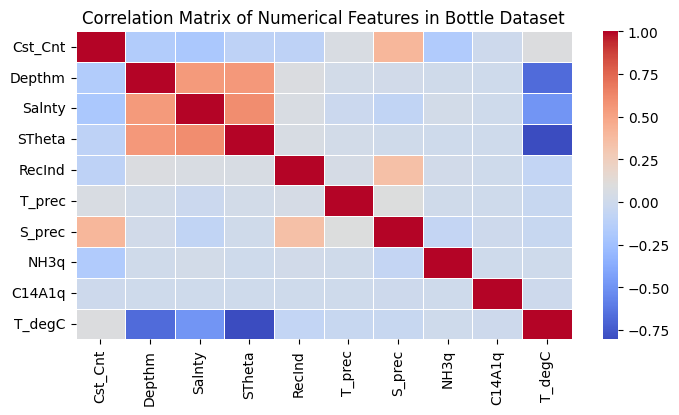

In [14]:
corr_matrix = new_bottle.corr()
# print(corr_matrix)
# Plot the heatmap
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features in Bottle Dataset")
plt.show()

In [15]:
# Check summary statistics for all features in the new dataset "new_bottle"
print(new_bottle.describe())

             Cst_Cnt         Depthm         Salnty         STheta  \
count  864863.000000  864863.000000  864863.000000  864863.000000   
mean    17138.790958     226.831951      33.841590      25.830153   
std     10240.949817     316.050259       0.449051       1.132444   
min         1.000000       0.000000      28.431000      20.934000   
25%      8269.000000      46.000000      33.504000      25.024000   
50%     16848.000000     125.000000      33.863000      25.996000   
75%     26557.000000     300.000000      34.180000      26.615000   
max     34404.000000    5351.000000      37.034000     250.784000   

              RecInd         T_prec         S_prec           NH3q  \
count  864863.000000  864863.000000  864863.000000  864863.000000   
mean        4.700273       2.016931       2.732294       8.951091   
std         1.877428       0.147566       0.442764       0.492093   
min         3.000000       1.000000       2.000000       4.000000   
25%         3.000000       2.0000

We handled the huge number of features by keeping just a portion of them and also the missing values by appling the most frequent value or the median where there is a null. A drawback of these two manipulations is that there is the possibility to create duplicate rows. So we must handle that now

In [16]:
# Count duplicate rows
print(f"Number of rows before removing duplicates: {new_bottle.shape[0]}")
duplicate_rows = new_bottle.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicate rows (keep only the first occurrence)
new_bottle = new_bottle.drop_duplicates()

# Verify that duplicates are removed
print(f"Number of rows after removing duplicates: {new_bottle.shape[0]}")


Number of rows before removing duplicates: 864863
Number of duplicate rows: 48
Number of rows after removing duplicates: 864815


## Distribution

We want to explore the distribution of values in the features of the new dataset

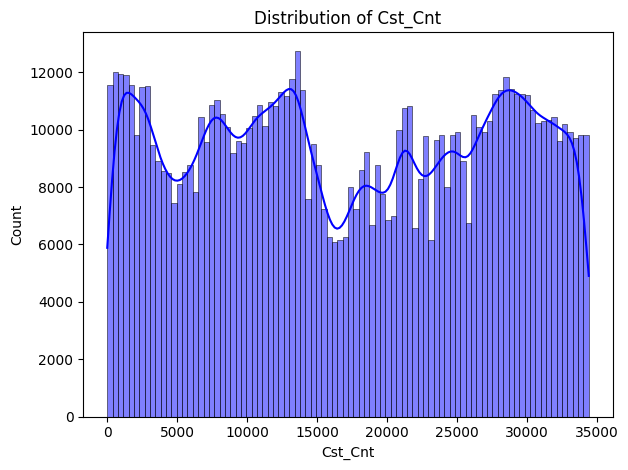

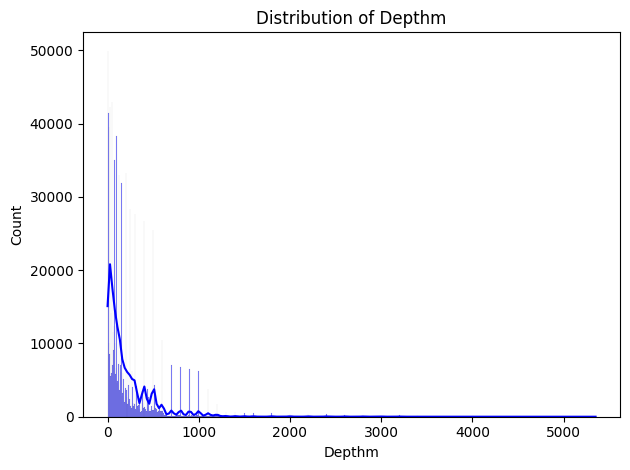

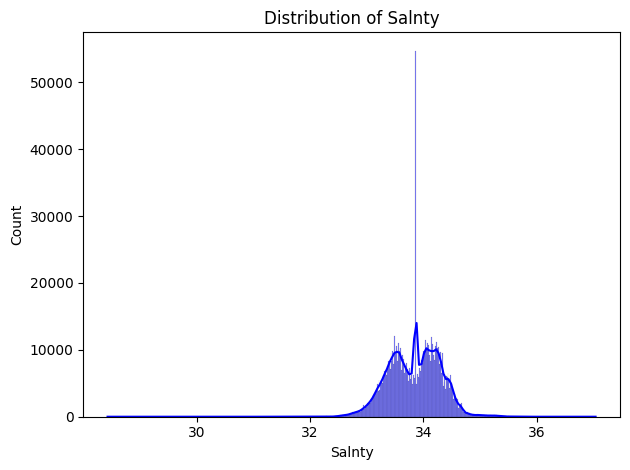

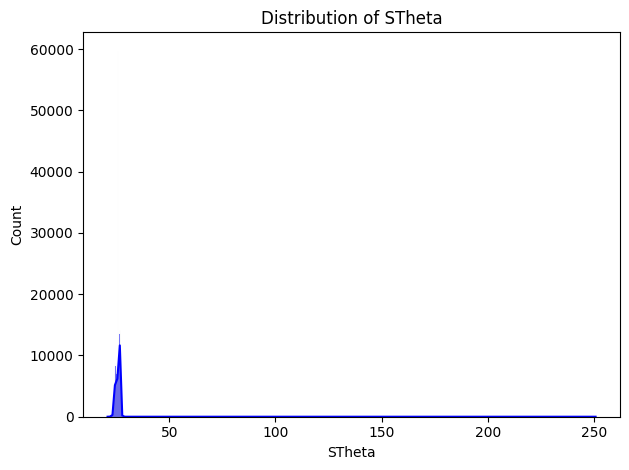

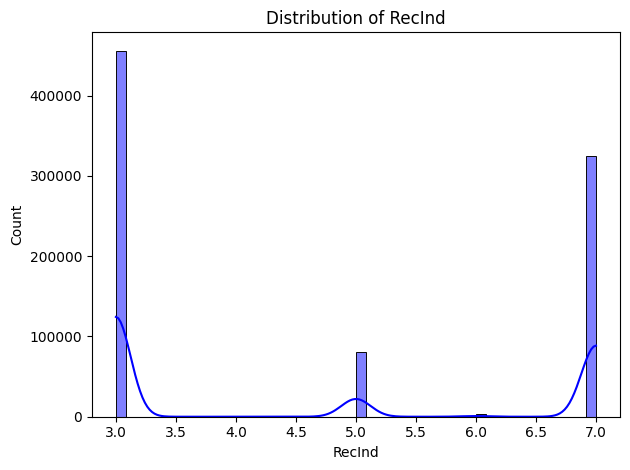

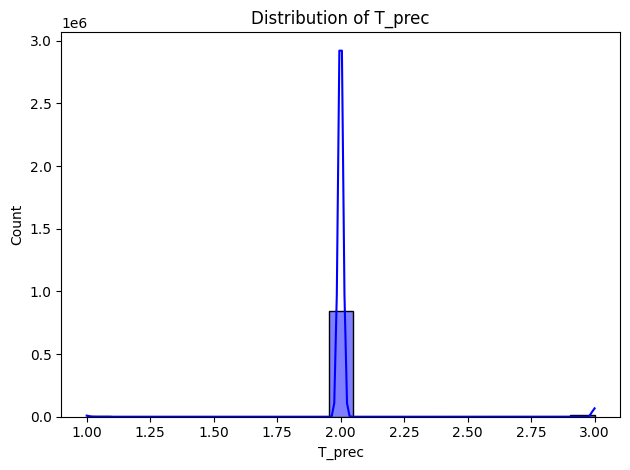

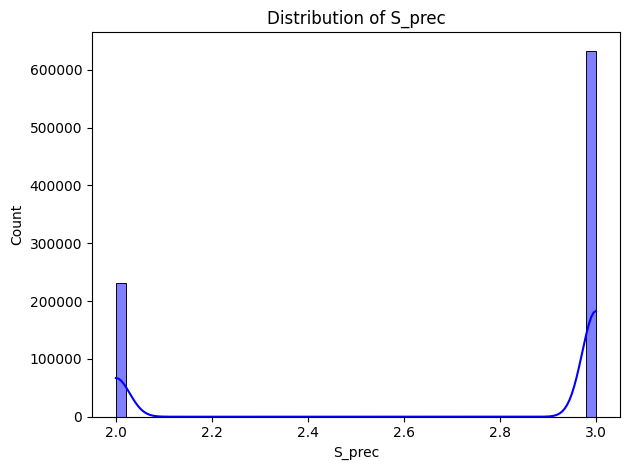

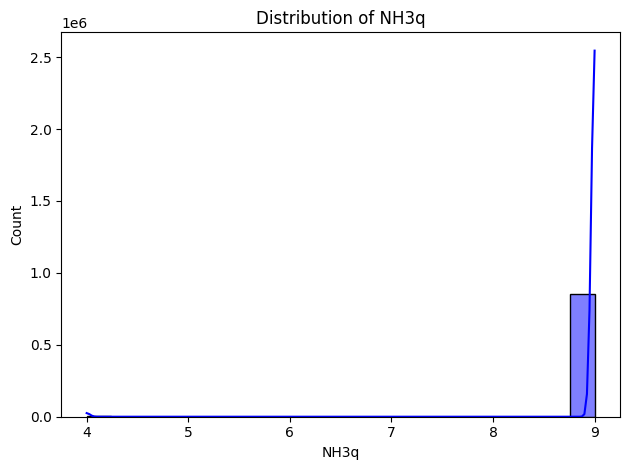

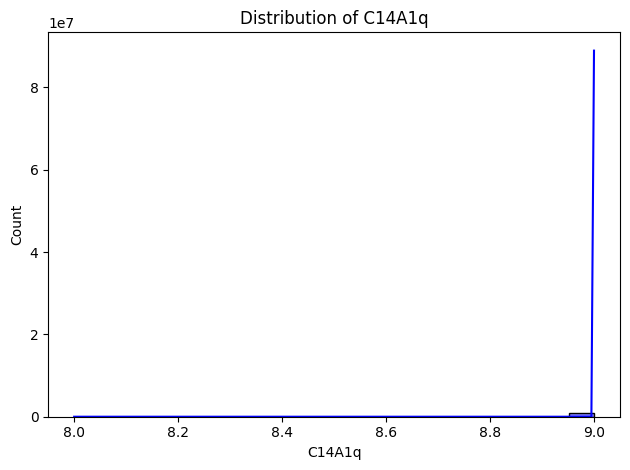

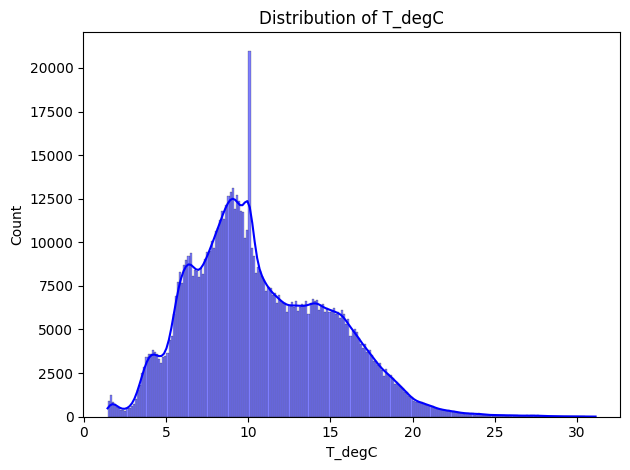

In [17]:
# Plot histograms distribution for all features and target
features = new_bottle.columns
for i, feature in enumerate(features):
    sns.histplot(new_bottle[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    
    plt.tight_layout()
    plt.show()

Some scatter plot to see how a feature effects the target

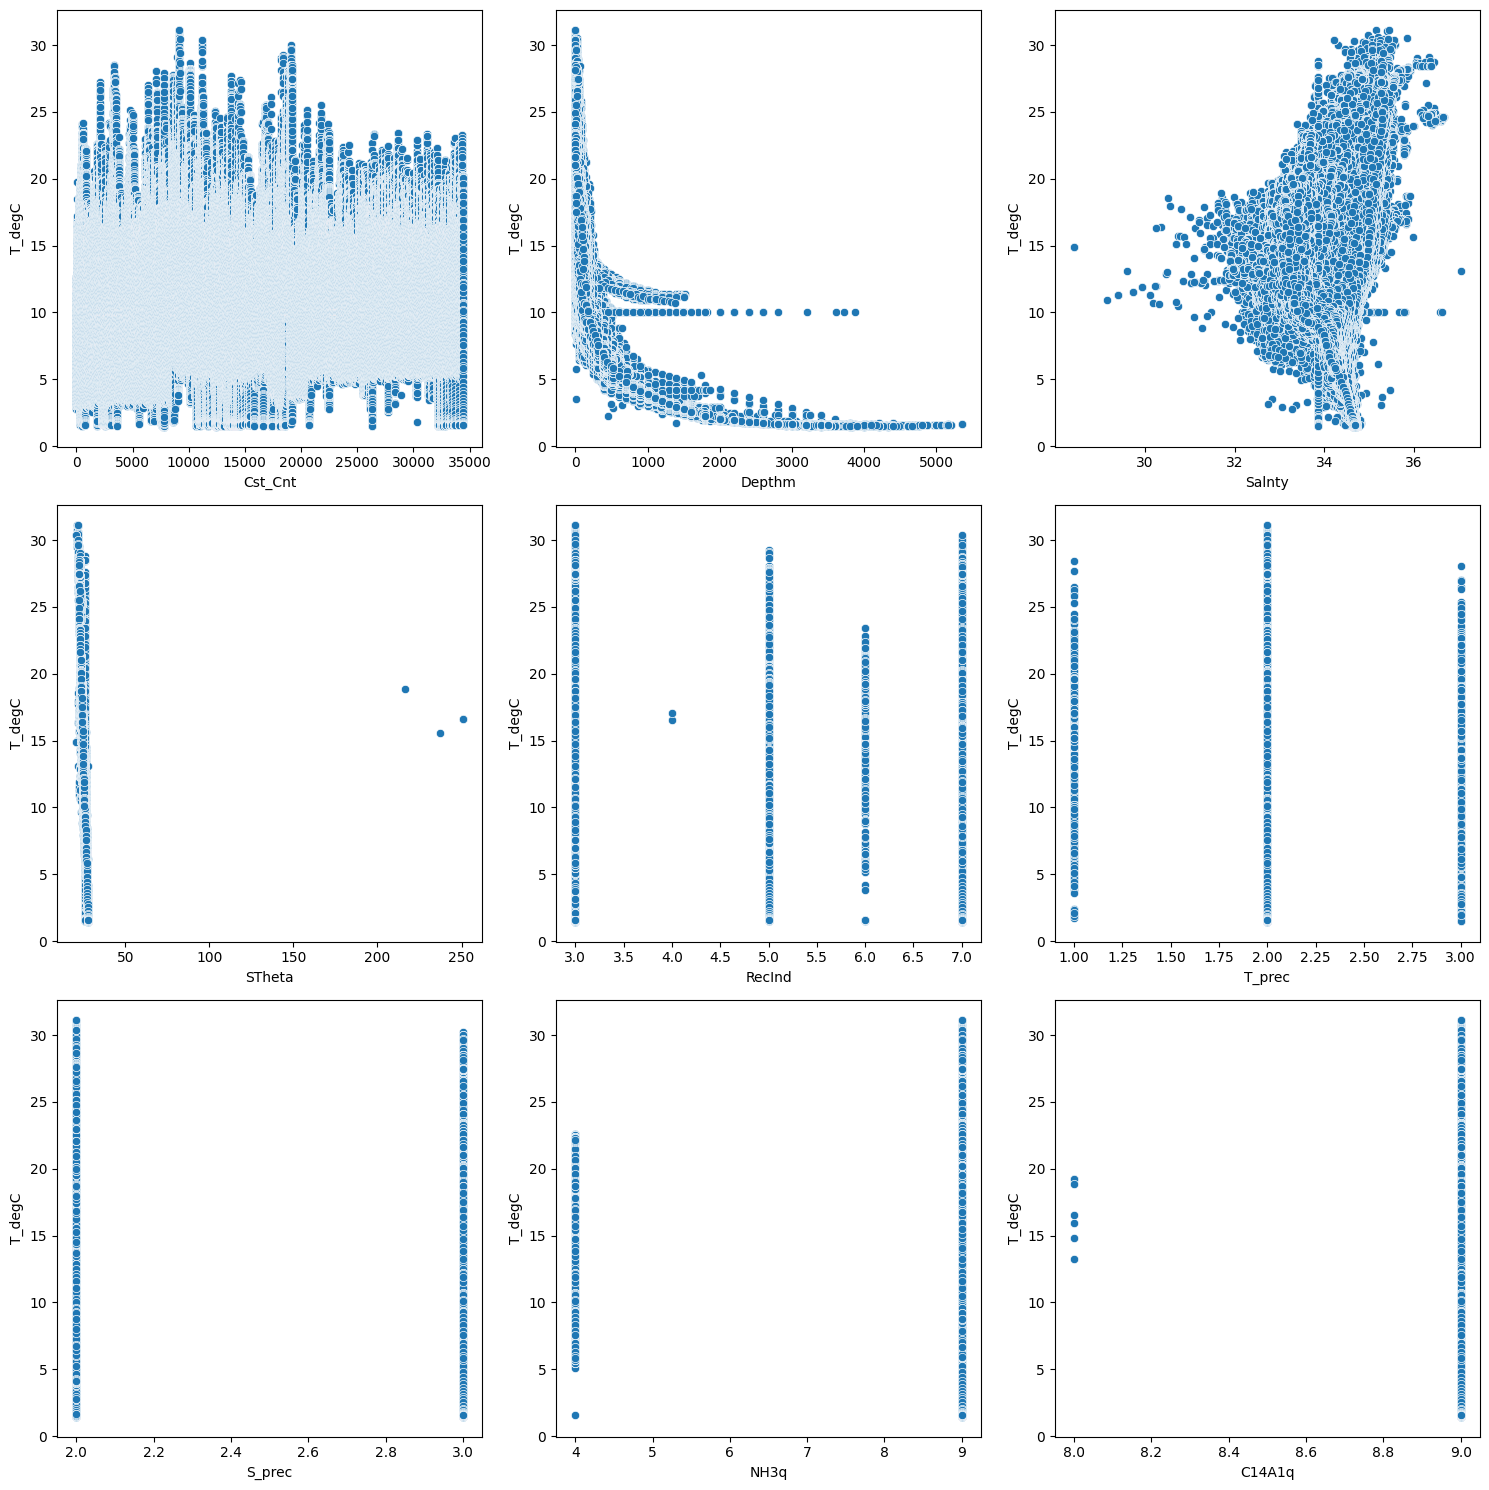

In [18]:
# Create a grid layout for the plots
cols = [col for col in new_bottle.columns if col != 'T_degC']
num_cols = len(cols)

# Define the number of rows and columns for the subplot grid
rows = (num_cols // 3) + (num_cols % 3 > 0)  # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))

axes = axes.flatten()

# Plotting each scatterplot: each feature in correlation with the target
for i, col in enumerate(cols):
    sns.scatterplot(x=new_bottle[col], y=new_bottle['T_degC'], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('T_degC')

# Hide unused subplot spaces (if any)
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Outliers

From the histograms, we can see that a lot of features present long tails, which is a symptom of the presence of outliers. Now we are going to show these outliers and then to handle them.

The Interquartile Range (IQR) is calculated for each numeric feature to facilitate outlier detection. The following code calculates the IQR for each numeric column in the DataFrame. The IQR, representing the range between the 25th and 75th percentiles and is stored in the IQR variable.

In [19]:
# Calculate IQR for all numeric features
Q1 = new_bottle.quantile(0.25)
Q3 = new_bottle.quantile(0.75)
IQR = Q3 - Q1

We are going to plot and histogram for each feature where are marked the outlier thresholds

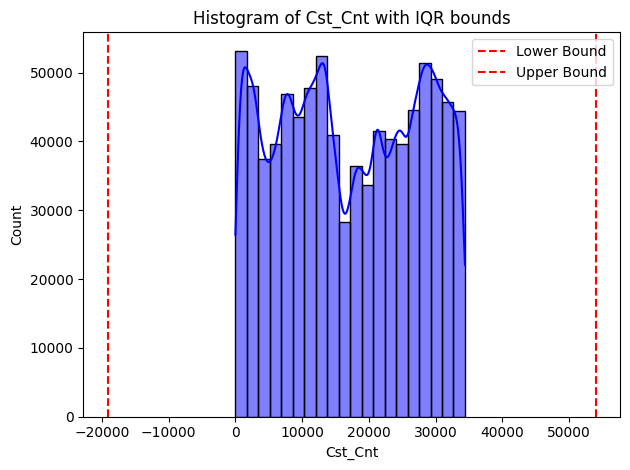

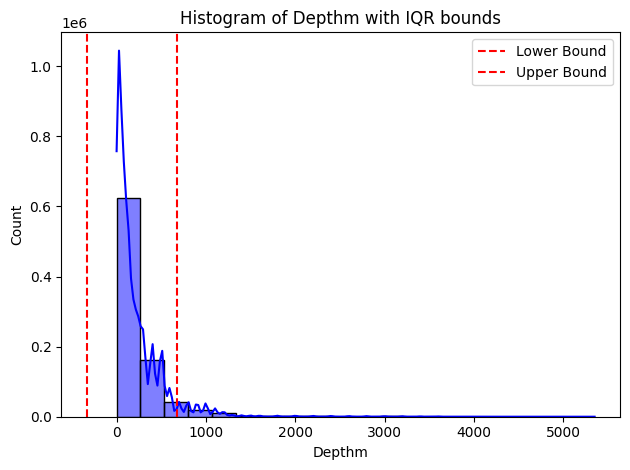

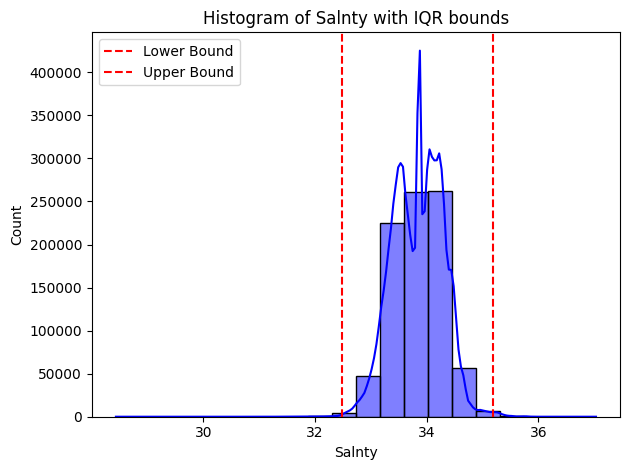

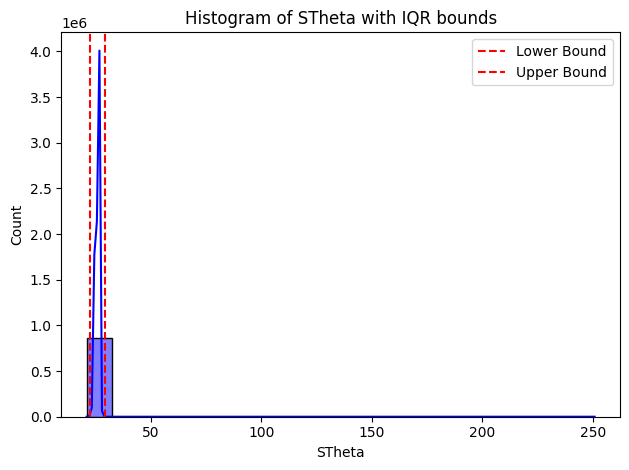

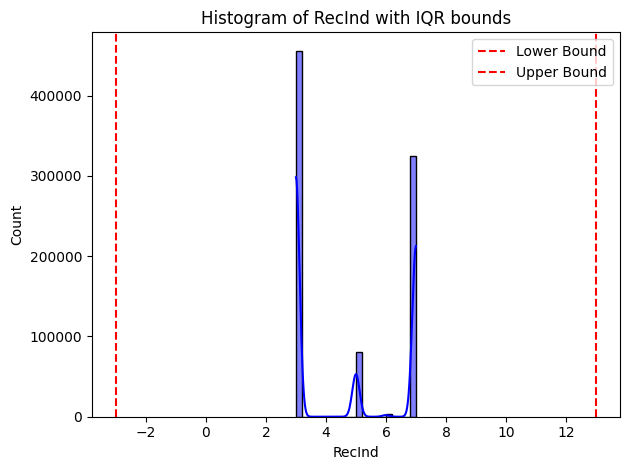

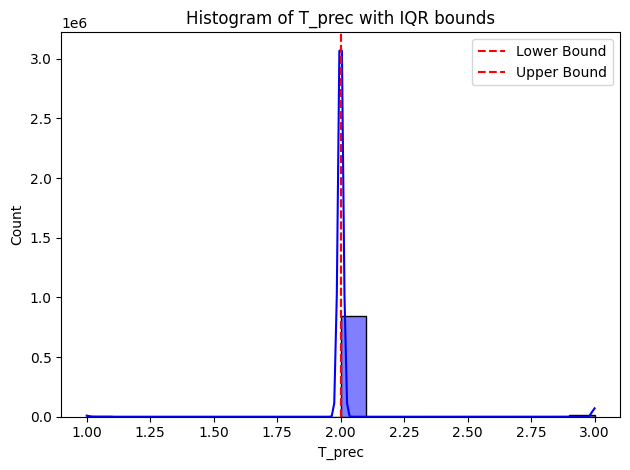

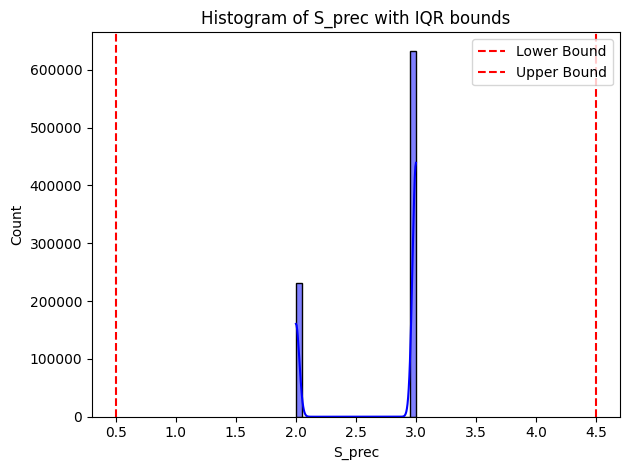

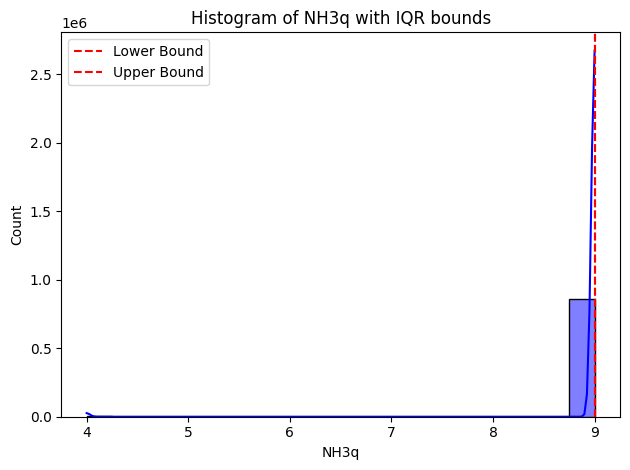

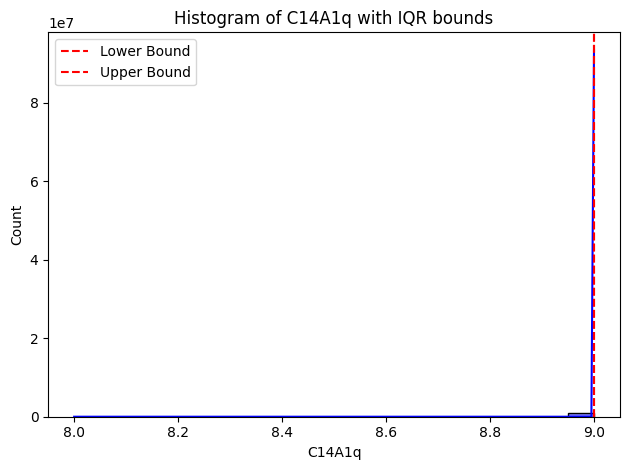

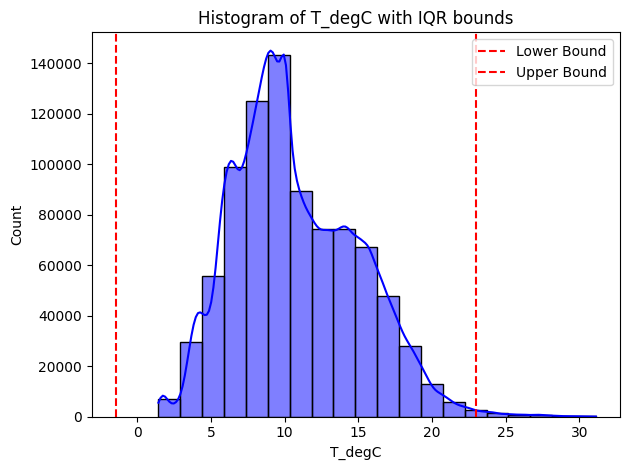

In [20]:
#plt.figure(figsize=(8, 6))

for i, feature in enumerate(features):
    #plt.subplot(4, 4, i + 1)
    sns.histplot(new_bottle[feature], kde=True, color='blue', bins=20)
    plt.axvline(x=Q1[feature] - 1.5 * IQR[feature], color='r', linestyle='--', label="Lower Bound")
    plt.axvline(x=Q3[feature] + 1.5 * IQR[feature], color='r', linestyle='--', label="Upper Bound")
    plt.title(f"Histogram of {feature} with IQR bounds")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In addition to the histograms, we like to shows where the outliers are in a scatter plot where each feature is correlated with the target

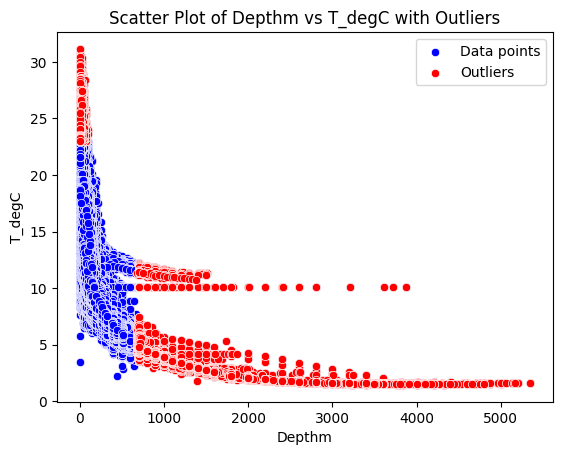

In [21]:
#plt.figure(figsize=(8, 6))

sns.scatterplot(x=new_bottle['Depthm'], y=new_bottle['T_degC'], color='blue', label='Data points')

# Highlight the outliers based on IQR
outliers = ((new_bottle['Depthm'] < (Q1['Depthm'] - 1.5 * IQR['Depthm'])) | 
            (new_bottle['Depthm'] > (Q3['Depthm'] + 1.5 * IQR['Depthm'])) |
            (new_bottle['T_degC'] < (Q1['T_degC'] - 1.5 * IQR['T_degC'])) | 
            (new_bottle['T_degC'] > (Q3['T_degC'] + 1.5 * IQR['T_degC'])))

# Plot the outliers in red
sns.scatterplot(x=new_bottle.loc[outliers, 'Depthm'], y=new_bottle.loc[outliers, 'T_degC'], color='red', label='Outliers')

plt.title("Scatter Plot of Depthm vs T_degC with Outliers")
plt.legend()
plt.show()

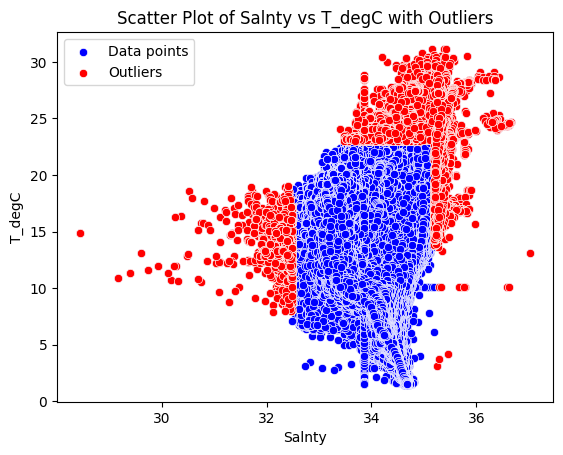

In [22]:
#plt.figure(figsize=(8, 6))

sns.scatterplot(x=new_bottle['Salnty'], y=new_bottle['T_degC'], color='blue', label='Data points')

outliers = ((new_bottle['Salnty'] < (Q1['Salnty'] - 1.5 * IQR['Salnty'])) | 
            (new_bottle['Salnty'] > (Q3['Salnty'] + 1.5 * IQR['Salnty'])) |
            (new_bottle['T_degC'] < (Q1['T_degC'] - 1.5 * IQR['T_degC'])) | 
            (new_bottle['T_degC'] > (Q3['T_degC'] + 1.5 * IQR['T_degC'])))

sns.scatterplot(x=new_bottle.loc[outliers, 'Salnty'], y=new_bottle.loc[outliers, 'T_degC'], color='red', label='Outliers')

plt.title("Scatter Plot of Salnty vs T_degC with Outliers")
plt.legend()
plt.show()

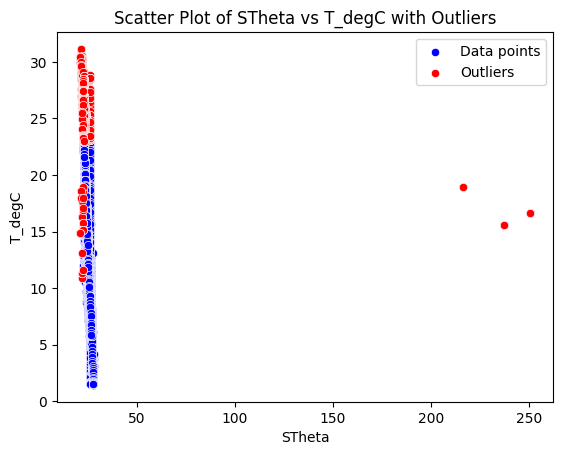

In [23]:
#plt.figure(figsize=(8, 6))

sns.scatterplot(x=new_bottle['STheta'], y=new_bottle['T_degC'], color='blue', label='Data points')

outliers = ((new_bottle['STheta'] < (Q1['STheta'] - 1.5 * IQR['STheta'])) | 
            (new_bottle['STheta'] > (Q3['STheta'] + 1.5 * IQR['STheta'])) |
            (new_bottle['T_degC'] < (Q1['T_degC'] - 1.5 * IQR['T_degC'])) | 
            (new_bottle['T_degC'] > (Q3['T_degC'] + 1.5 * IQR['T_degC'])))

sns.scatterplot(x=new_bottle.loc[outliers, 'STheta'], y=new_bottle.loc[outliers, 'T_degC'], color='red', label='Outliers')

plt.title("Scatter Plot of STheta vs T_degC with Outliers")
plt.legend()
plt.show()

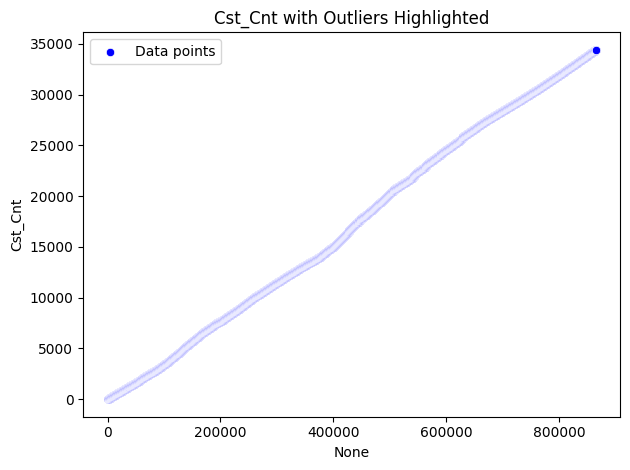

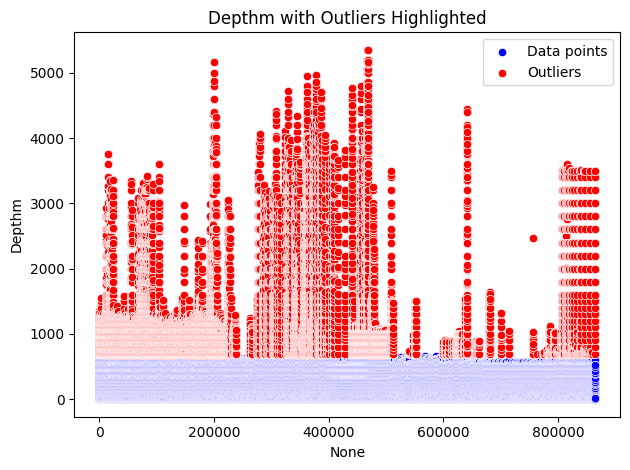

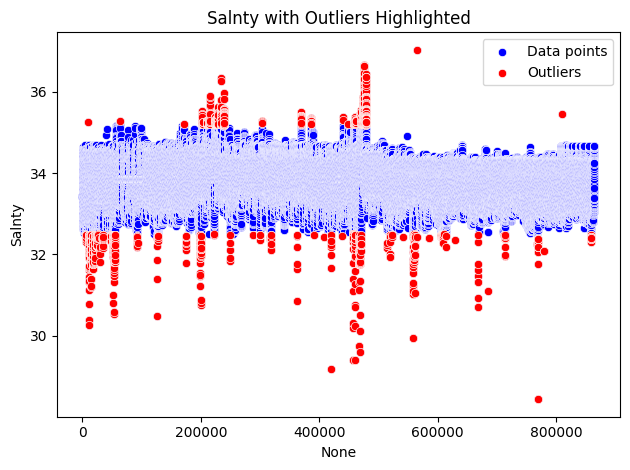

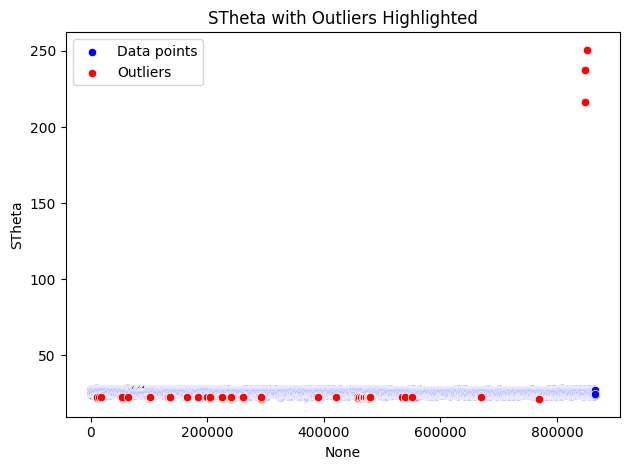

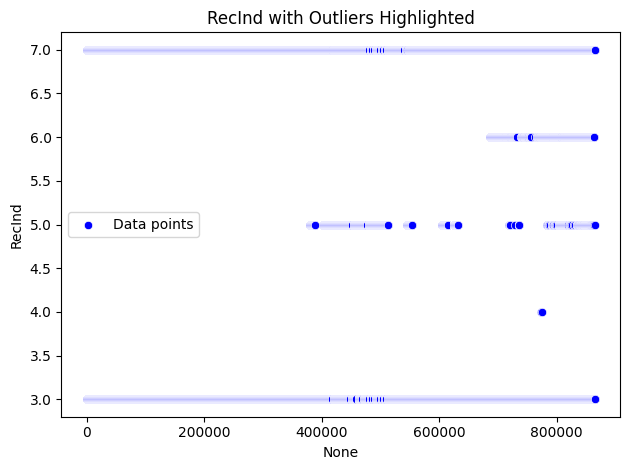

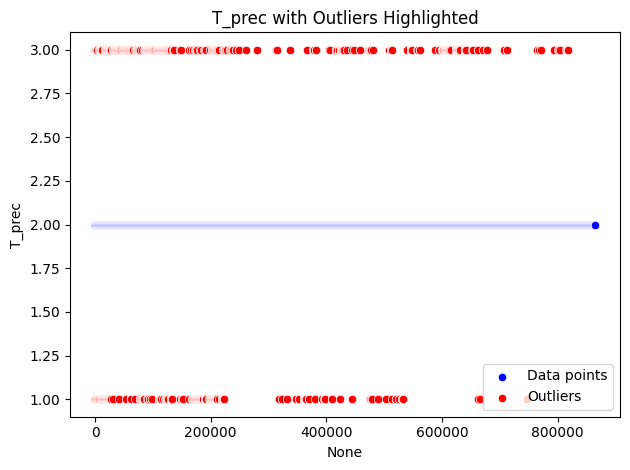

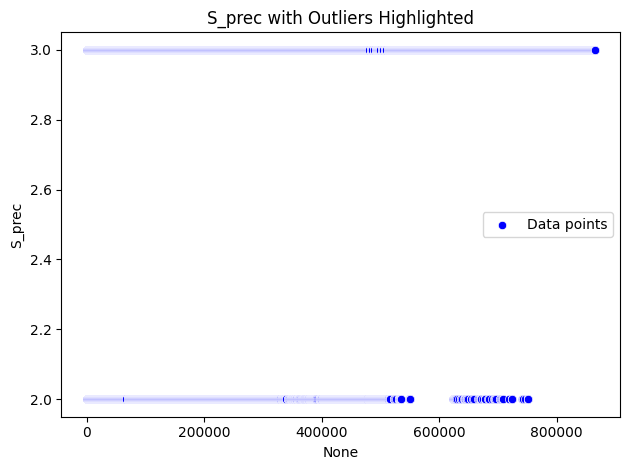

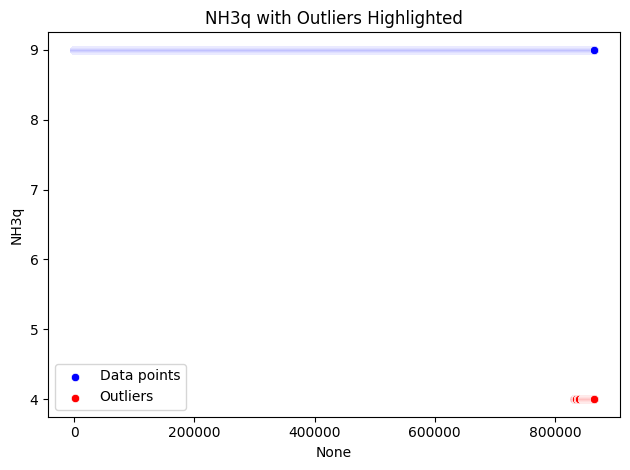

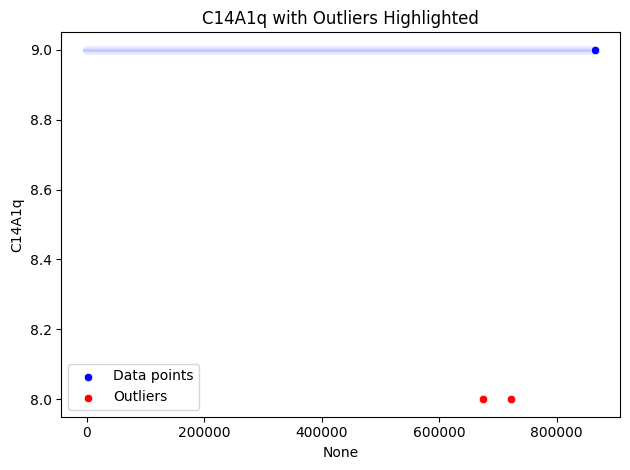

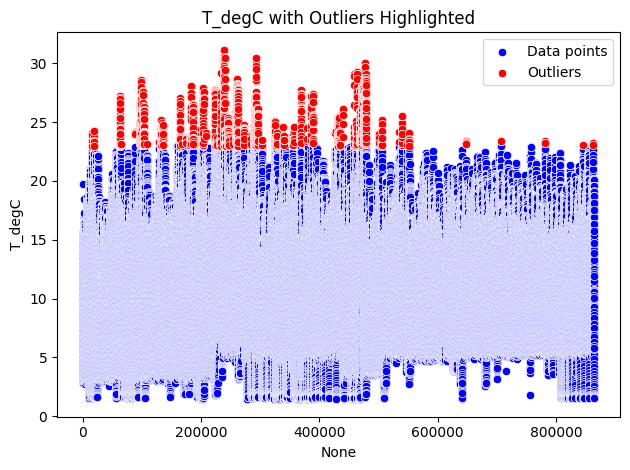

In [24]:
outliers = ((new_bottle < (Q1 - 1.5 * IQR)) | (new_bottle > (Q3 + 1.5 * IQR)))

# Scatter plot with outliers marked
for i, feature in enumerate(features):
    #plt.subplot(4, 4, i + 1)
    sns.scatterplot(x=new_bottle.index, y=new_bottle[feature], color='blue', label="Data points")
    sns.scatterplot(x=new_bottle.loc[outliers[feature], :].index, y=new_bottle.loc[outliers[feature], feature], color='red', label="Outliers")
    plt.title(f"{feature} with Outliers Highlighted")
    plt.legend()

    plt.tight_layout()
    plt.show()

In addition to the graphical visualization, is important to show the number of outliers per feature

In [25]:
# Define outliers
outliers = ((new_bottle < (Q1 - 1.5 * IQR)) | (new_bottle > (Q3 + 1.5 * IQR)))

# Show outliers in the DataFrame
print(f"N outliers before manipulation\n{outliers.sum()}")

N outliers before manipulation
Cst_Cnt        0
Depthm     54779
Salnty      3626
STheta       815
RecInd         0
T_prec     19081
S_prec         0
NH3q        8460
C14A1q         7
T_degC      4017
dtype: int64


We decided handle the outliers by replacing them with the median value of each feature 

In [26]:
Q1 = new_bottle.quantile(0.25)
Q3 = new_bottle.quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = ((new_bottle < (Q1 - 1.5 * IQR)) | (new_bottle > (Q3 + 1.5 * IQR)))

# Replace outliers with the median
for col in new_bottle.columns:
    if new_bottle[col].dtype in ['float64', 'int64']:  # Only numeric columns
        median_value = new_bottle[col].median()
        new_bottle[col] = np.where(outliers[col], median_value, new_bottle[col])

# Define outliers
outliers = ((new_bottle < (Q1 - 1.5 * IQR)) | (new_bottle > (Q3 + 1.5 * IQR)))

# Show outliers after manipulation
print(f"N outliers after manipulation\n{outliers.sum()}")

N outliers after manipulation
Cst_Cnt    0
Depthm     0
Salnty     0
STheta     0
RecInd     0
T_prec     0
S_prec     0
NH3q       0
C14A1q     0
T_degC     0
dtype: int64


Again, by replacing some values with the most the median, there is the drawback that some duplicated rows can be created. As done before, we are going to reove these columns by keeping just the first occurrence

In [27]:
# Count duplicate rows
print(f"Number of rows before removing duplicates: {new_bottle.shape[0]}")
duplicate_rows = new_bottle.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicate rows and keep only the first occurrence
bottle_cleaned = new_bottle.drop_duplicates()

# Verify that duplicates are removed
print(f"Number of rows after removing duplicates: {bottle_cleaned.shape[0]}")

Number of rows before removing duplicates: 864815
Number of duplicate rows: 244
Number of rows after removing duplicates: 864571


# Prediction model

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [29]:
new_bottle.columns

Index(['Cst_Cnt', 'Depthm', 'Salnty', 'STheta', 'RecInd', 'T_prec', 'S_prec',
       'NH3q', 'C14A1q', 'T_degC'],
      dtype='object')

In [30]:
# Split T_DegC (y) from the rest of the features (x) to consider it as unknown
X = new_bottle.drop(columns=['T_degC'])
y = new_bottle['T_degC'] 

In [31]:
# Also we split the datafram in train and test set with a split ratio of 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train set shape: ", X_train.shape)
print("X Test set shape: ", X_test.shape)
print("Y Train set shape: ", y_train.shape)
print("Y Test set shape: ", y_test.shape)

X Train set shape:  (605370, 9)
X Test set shape:  (259445, 9)
Y Train set shape:  (605370,)
Y Test set shape:  (259445,)


We decided to build more than one prediction model to then the possibility to compare the different performances

## Linear Regression

In [32]:
model = LinearRegression()  

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"R² Score train: {r2_train:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Cross-validation to verify generalization
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Mean Cross-validation R²:", np.mean(cv_scores))


Mean Squared Error: 2.0347
R² Score: 0.8790
R² Score train: 0.8814
Mean Absolute Error: 0.6154
Cross-validation R² scores: [0.75764455 0.8561486  0.85838767 0.9826934  0.9522998 ]
Mean Cross-validation R²: 0.8814348045355903


## Random Forest

In [33]:
rf_reg = RandomForestRegressor(n_estimators=5, random_state=42)

rf_reg.fit(X_train,y_train)

y_pred = rf_reg.predict(X_test)
y_pred_train = rf_reg.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"R² Score train: {r2_train:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Cross-validation to verify generalization
cv_scores = cross_val_score(rf_reg, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Mean Cross-validation R²:", np.mean(cv_scores))

Mean Squared Error: 0.1751
R² Score: 0.9896
R² Score train: 0.9967
Mean Absolute Error: 0.0675
Cross-validation R² scores: [0.94041071 0.98103147 0.95573571 0.9903269  0.99299097]
Mean Cross-validation R²: 0.9720991507640964


## Decision Tree

In [34]:
dt_reg = DecisionTreeRegressor()

dt_reg.fit(X_train,y_train)

dt_predict_train = dt_reg.predict(X_train)
y_pred = dt_reg.predict(X_test)
y_pred_train = dt_reg.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"R² Score Train: {r2_train:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Cross-validation to verify generalization
cv_scores = cross_val_score(dt_reg, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Mean Cross-validation R²:", np.mean(cv_scores))

Mean Squared Error: 0.2039
R² Score: 0.9879
R² Score Train: 0.9983
Mean Absolute Error: 0.0703
Cross-validation R² scores: [0.91917472 0.97145534 0.94729996 0.98338712 0.99346573]
Mean Cross-validation R²: 0.962956574826857
